In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
# from sklearn.metrics import r2_score

import sklearn
from sklearn.linear_model import LinearRegression

In [4]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

PROBLEM STATEMENT:  
     Delivery_time(Y) -> Predict delivery time using sorting time 

In [5]:
data = pd.read_csv('delivery_time.csv')

In [7]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA and Data Visualization

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


6.190476190476191


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

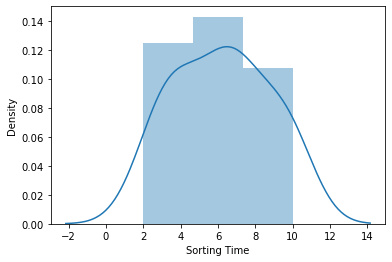

In [9]:
#Distribution of the Data using Density plot wrt Sorting Time(X variable)
print(data['Sorting Time'].mean())
sns.distplot(data['Sorting Time'])  

16.79095238095238


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

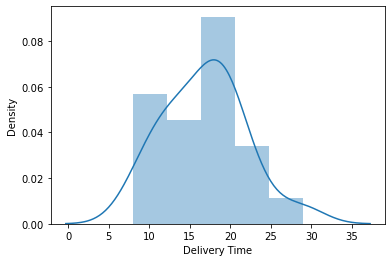

In [10]:
#Distribution of the Data wrt Delivery Time(Y variable)
print(data['Delivery Time'].mean())
sns.distplot(data['Delivery Time'])

# Feature Engineering

In [11]:
data = data.rename({'Delivery Time':'DeliveryTime', 'Sorting Time':'SortingTime'}, axis=1)

In [12]:
data.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# Correlation analysis

In [13]:
#Undesrtanding the Correlation 
data.corr()  # here they are 82 percent so its high positively corelated(Very Close to +1)

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


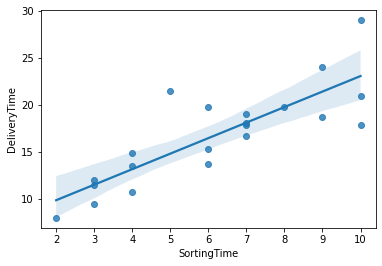

In [41]:
#Another way understanding correlation Using regression plot plotting the best fit line along with the datapoints
#and the shade is the Confidence interval (95% is that it will lie in that shade)
    
sns.regplot(x="SortingTime", y="DeliveryTime", data=data);

#  Model Building :Statsmodel

In [14]:
# To Fit a line we import below:  statsmodels is package its in api

import statsmodels.formula.api as smf


In [15]:
# This code is just that to Treat Whatever before ~ is Y variable and after ~ it is X variable
# Using  OLS (ordinary lead Square method) for ßo & ß1 

model = smf.ols("DeliveryTime~SortingTime",data = data).fit() 

# Model Testing

In [16]:
# Beta Coefficients

model.params 

# ßo=6.582  ß1=1.649

#Interpretation of SortingTime beta coefficient
#For every unit increase in SortingTime value, the value for DeliveryTime will increase by 1.649
# Given a unit increase in SortingTime variable, The DeliveryTime variable increases by 1.649 since it is a positive beta coefficient for SortingTime variable.


Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [168]:
# Finding Pvalues and tvalues

#To prove the Hypothesis
#                      slope(ß1)
#here Hypothesis says  Ho: ß1 = 0
#                      Ha :ß1 != 0 { here the pValue of SortingTime is 0.00004 <<< {α}0.05 } so Ho Rejected and Ha accepted

model.tvalues, model.pvalues


#'''Since p-value(SortingTime) is less that << 0.05  for  'SortingTime' variable,
#We can say that it is a significant variable predicting the dependent variable 'DeliveryTime'''

(Intercept      3.823349
 SortingTime    6.387447
 dtype: float64,
 Intercept      0.001147
 SortingTime    0.000004
 dtype: float64)

In [42]:
#R squared values
model.rsquared

#68% of variation in the dependent variable is explained by the given independent variable
#This 0.68 ~68% is average percentage accuracy for the model we can do further Transformations

0.6822714748417231

In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 18 Mar 2022   Prob (F-statistic):           3.98e-06
Time:                        08:26:34   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here r-Squared value: # R-Sqr = 0.68 ~68% 
We can further Improve by Transformations  using  stats library

## Transformation:

In [ ]:
# Why Transformation:  If Y and X have No good linear relationship : It you have data that is exponentialy increasing (like a linear parabola) we cant predict Y properly
# So we use some log function to make/try the data points bit scattered linearly corelation on graph(for good linear relationship) so we can create a good linear relationship model

# For the Best Accuracy  you need to make some changes in X and Y variable we can achieve using Transformation
# We try to change:
Model2: X to Log(x)  /or
    Model3: Y -> log(Y) /or 
        Model4: X->X+X² and Y -> log(Y)

# MODEL 2   for transformation  USING LOG
## X to Log(X)

##  ~ np.log(SortingTime)

In [45]:
#  make some changes/transformation in the data like change x to log(x)-> y=alogx + b (log will change the x data(waist))
model2 = smf.ols('DeliveryTime~np.log(SortingTime)', data=data).fit()
model2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 18 Mar 2022   Prob (F-statistic):           2.64e-06
Time:                        08:26:52   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(SortingTime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-Sqr = 0.695 ~69% 
here 0.69 - 0.68(earlier) = 0.01 -> 1% increase after using log on X
here the change is 0.01  its less # We can further Improve

In [68]:
model2

# MODEL 3   for transformation  USING LOG
## Y to Log(Y)

##  np.log(DeliveryTime)~

In [46]:
model3 = smf.ols('np.log(DeliveryTime)~SortingTime', data=data).fit()  # here we make change as y=ax+b -> logy = ax+b
model3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.711
Model:                              OLS   Adj. R-squared:                  0.696
Method:                   Least Squares   F-statistic:                     46.73
Date:                  Fri, 18 Mar 2022   Prob (F-statistic):           1.59e-06
Time:                          08:26:55   Log-Likelihood:                 7.7920
No. Observations:                    21   AIC:                            -11.58
Df Residuals:                        19   BIC:                            -9.495
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
SortingTime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-Sqr = 0.71 ~71%

# Model Predictions


In [165]:
# Manual prediction for say sorting time 8   : Y = ßo + ß1(SortingTime)
x = 2.1214 + (0.1056 * 8)
print(np.exp(x))

19.417990855134793


In [166]:
# Manual prediction for say sorting time 12
x = 2.1214 + (0.1056 * 12)
print(np.exp(x))

29.624448996261073


In [167]:
## Automatic Prediction for say sorting time 5,8,9,10,11,12
newdata=pd.Series([8,9,10,11,12])

In [154]:
data_pred=pd.DataFrame(newdata,columns=['SortingTime'])
data_pred

,SortingTime
0,8
1,9
2,10
3,11
4,12


In [157]:
data_pred['newData_Predicted'] = np.exp(model3.predict(data_pred))
data_pred                                     

,SortingTime,newData_Predicted
0,8,19.409927
1,9,21.570707
2,10,23.972032
3,11,26.640682
4,12,29.606414
